In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

from utils.dataprep import load_emb_gz, make_categories, load_emb

In [2]:
embedding_file = "data/imagenet-27x80-vgg19.test-ctg.emb.gz"
# embedding_file = "data/imagenet-200x65-vgg19.train.emb.gz"

In [29]:
_, labels, vectors = load_emb_gz(embedding_file)
categories = make_categories(labels)
categories

DONE. 2193 items loaded from data/imagenet-27x80-vgg19.test-ctg.emb.gz.
27 categories found.


array([4, 4, 4, ..., 6, 6, 6], dtype=int64)

First reduce the number of dims with PCA.

In [5]:
vectors_reduced = PCA(n_components=50).fit_transform(vectors)
vectors_reduced

array([[-1.66526075e-01,  8.96740653e-01,  3.16946725e-01, ...,
         1.06641639e-03,  8.41746394e-04, -7.07157962e-04],
       [-1.62014890e-01,  8.68247393e-01,  3.06127094e-01, ...,
         2.68101060e-03,  1.08737699e-03, -2.59337188e-04],
       [-1.66384921e-01,  8.95848372e-01,  3.16608245e-01, ...,
         9.80318882e-04,  8.12986716e-04, -6.81052842e-04],
       ...,
       [-2.01948218e-02, -1.32977342e-02, -2.63729729e-02, ...,
         1.29320478e-03, -8.11153060e-03, -4.53906937e-03],
       [-2.51071295e-02, -1.74344400e-02, -3.35164500e-02, ...,
         2.33924599e-03, -4.48097692e-03,  1.43660212e-03],
       [-1.99403359e-02, -1.34019345e-02, -2.55386294e-02, ...,
         5.52441660e-03, -4.31681406e-03, -1.96540048e-03]])

In [6]:
vectors_reduced.shape

(2193, 50)

In [16]:
coords_2 = TSNE(n_components=2).fit_transform(vectors_reduced)
coords_3 = TSNE(n_components=3).fit_transform(vectors_reduced)

## Scatterplot with image categories

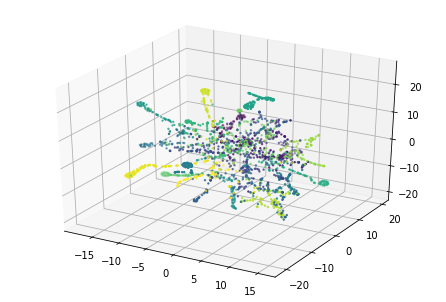

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*coords_3.T, c=categories, s=np.ones_like(categories)*2)
plt.show()

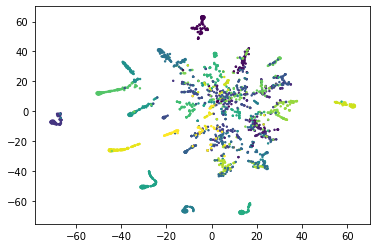

In [20]:
plt.scatter(*coords_2.T, c=categories, s=np.ones_like(categories)*2)

Looks okay, categories are separated.

## UMAP

In [22]:
from umap import UMAP

In [50]:
coords_2 = UMAP(n_components=2, n_neighbors=10).fit_transform(vectors_reduced)

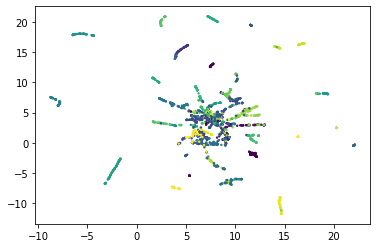

In [51]:
plt.scatter(*coords_2.T, c=categories, s=np.ones_like(categories)*2)

In [52]:
coords_3 = UMAP(n_components=3, n_neighbors=5).fit_transform(vectors)

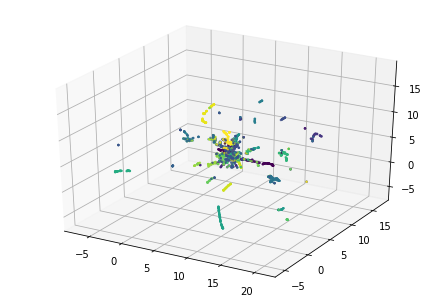

In [53]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*coords_3.T, c=categories, s=np.ones_like(categories)*2)
plt.show()